# Analyse Exploratoire des Données

## Sommaire
1. [Introduction](#Introduction)
2. [Exploration des Données](#Exploration-des-Données)
3. [Définitions des KPIs](#Définitions-des-KPIs)
4. [Analyse des Facteurs Contribuants](#Analyse-des-Facteurs-Contribuants)
5. [Recommandations Stratégiques](#Recommandations-Stratégiques)
6. [Conclusion](#Conclusion)

---

## Introduction

L'objectif de cette analyse est d'examiner les données collectées par CampusCARE auprès des étudiants afin de :
- Identifier les KPIs pertinents pour le suivi de la santé mentale.
- Déterminer les facteurs contribuant à la dépression chez les étudiants.
- Proposer des stratégies d'intervention précoces.

---

## Exploration des Données

### Importation des bibliothèques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium

### Chargement du DataSet

In [3]:
df_kpi= pd.read_csv('../donnees/nettoyees/df_kpi_final.csv')
df_kpi.head()

,Genre,Age,Ville,Niveau étude,Pression Académique,CGPA,Satisfaction Académique,Temps de sommeil,Habitudes Alimentaires,Pensées Suicidaires,Temps études/jour(heures),Stress Financier,Antécédents familiaux mentaux,Dépression,Etat,Population,Latitude,Longitude
0,Homme,33,Visakhapatnam,Bachelor,5,8.97,2,5-6 heures,Saines,True,3,1,False,1,Andhra Pradesh,969608,17.7000,83.2500
1,Femme,24,Bangalore,Bachelor,2,5.90,5,5-6 heures,Modérées,False,3,2,True,0,Karnataka,15386000,12.9789,77.5917
2,Homme,31,Srinagar,Bachelor,3,7.03,5,Moins de 5 heures,Saines,False,9,1,True,0,Jammu & Kashmir,1180570,34.0800,74.8000
3,Femme,28,Varanasi,Bachelor,3,5.59,2,7-8 heures,Modérées,True,4,5,True,1,Uttar Pradesh,1198491,25.3200,82.9900
4,Femme,25,Jaipur,Master,4,8.13,3,5-6 heures,Modérées,True,1,1,False,0,Rajasthan,3073350,26.9200,75.7800


---

### Statistiques descriptives

In [5]:
df_kpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27767 entries, 0 to 27766
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Genre                          27767 non-null  object 
 1   Age                            27767 non-null  int64  
 2   Ville                          27767 non-null  object 
 3   Niveau étude                   27767 non-null  object 
 4   Pression Académique            27767 non-null  int64  
 5   CGPA                           27767 non-null  float64
 6   Satisfaction Académique        27767 non-null  int64  
 7   Temps de sommeil               27767 non-null  object 
 8   Habitudes Alimentaires         27767 non-null  object 
 9   Pensées Suicidaires            27767 non-null  bool   
 10  Temps études/jour(heures)      27767 non-null  int64  
 11  Stress Financier               27767 non-null  int64  
 12  Antécédents familiaux mentaux  27767 non-null 

In [6]:
df_kpi.describe()

,Age,Pression Académique,CGPA,Satisfaction Académique,Temps études/jour(heures),Stress Financier,Dépression,Population,Latitude,Longitude
count,27767.000000,27767.000000,27767.000000,27767.000000,27767.000000,27767.000000,27767.000000,2.776700e+04,27767.000000,27767.000000
mean,25.818382,3.142003,7.658516,2.944538,7.160766,3.139626,0.585227,3.287059e+06,23.285572,77.857669
std,4.906807,1.381350,1.464744,1.360352,3.705990,1.436997,0.492692,4.395995e+06,5.028222,4.830403
min,18.000000,0.000000,5.030000,0.000000,0.000000,1.000000,0.000000,1.005750e+05,12.978900,70.800000
25%,21.000000,2.000000,6.290000,2.000000,4.000000,2.000000,0.000000,1.305429e+06,19.470000,73.790000
50%,25.000000,3.000000,7.770000,3.000000,8.000000,3.000000,1.000000,1.752371e+06,22.980000,77.410000
75%,30.000000,4.000000,8.920000,4.000000,10.000000,4.000000,1.000000,3.124458e+06,26.920000,80.330000
max,59.000000,5.000000,10.000000,5.000000,12.000000,5.000000,1.000000,2.497300e+07,34.080000,88.430000


### Interprétation des Résultats Statistiques

- **Âge des étudiants**
    - Moyenne : ***25,8 ans***
    - Répartition : La majorité des étudiants sont jeunes adultes (entre 21 et 30 ans), avec une étendue de 18 à 59 ans.

- **Pression Académique**
    - Moyenne : ***3,14/5***
    - Répartition : Une pression modérée est observée chez la plupart des étudiants, avec quelques cas extrêmes notés (minimum 0, maximum 5).

- **CGPA (Moyenne des notes)**
    - Moyenne : ***7,66/10***
    - Répartition : Les résultats académiques sont globalement bons, bien que certains étudiants aient des CGPA plus faibles (minimum 5,03).

- **Satisfaction Académique**
    - Moyenne : ***2,94/5***
    - Répartition : La satisfaction est proche de la moyenne, mais une proportion significative d'étudiants semble insatisfaite (quartile inférieur à 2).

- **Temps d'étude quotidien**
    - Moyenne : ***7,16 h par jour***
    - Répartition : Bien que la médiane soit de 8 heures, certains étudiants étudient très peu (minimum 0) ou de façon excessive (maximum 12 heures).

- **Stress Financier**
    - Moyenne : ***3,14 / 5***
    - Répartition : Une majorité d'étudiants ressent un stress financier modéré, mais certains subissent un stress intense (quartile supérieur à 4).

- **Proportion d'étudiants dépressifs**
    - Moyenne : ***58 %*** des étudiants
    - Répartition : Une majorité significative des étudiants présente des signes de dépression.

### Conclusion
Les résultats mettent en évidence des défis significatifs tels qu'***une pression académique élevée***, ***un stress financier modéré à élevé***, et ***un taux de dépression préoccupant***.

Ces facteurs nécessitent une analyse approfondie pour identifier des corrélations et proposer des solutions adaptées.


---

## Définitions des KPIs

### Méthodologie

Les ***KPIs*** sont définis pour répondre aux objectifs principaux de l’analyse, à savoir ***identifier les facteurs contribuant à la dépression chez les étudiants*** et ***concevoir des stratégies d’intervention***.

Pour ce faire, nous ***sélectionnons des indicateurs directement liés aux données comportementales, académiques, et psychologiques des étudiants***.

Ces KPIs permettent d’***évaluer l’état mental général, les habitudes de vie, et les pressions externes subies par les étudiants***. 

Le choix des KPIs repose sur leur ***capacité à fournir des insights pertinents et mesurables, facilitant ainsi le suivi des tendances et l’identification des populations à risque***.

### Liste des KPIs
- **KPI 1 : Proportion d'étudiants dépressifs** : Calculée comme le pourcentage d'étudiants ayant une valeur "Dépression" égale à 1.

- **KPI 2 : Moyenne des heures de sommeil** : Suivi pour identifier les habitudes de sommeil.
- **KPI 3 : Moyenne des habitudes alimentaires** : Suivi pour identifier les habitudes alimentaires.
- **KPI 4 : Niveau moyen de pression académique** : Pour évaluer l'impact des exigences académiques.
- **KPI 5 : Proportion d'étudiants avec pensées suicidaires** : Indicateur critique de santé mentale.
- **KPI 6 : Répartition géographique des étudiants dépressifs** : Pourcentage d'étudiants dépressifs dans chaque région, permettant d'identifier les zones où les interventions sont les plus nécessaires.

In [21]:
# Calcul des KPIs
kpi_depression = df_kpi['Dépression'].mean() * 100
kpi_sommeil = df_kpi['Temps de sommeil'].value_counts(normalize=True) * 100
kpi_habitudes_alimentaires = (df_kpi['Habitudes Alimentaires'].value_counts(normalize=True) * 100)
kpi_pression = df_kpi['Pression Académique'].mean()
kpi_suicidaire = df_kpi['Pensées Suicidaires'].mean() * 100
kpi_geo_depression = (df_kpi.groupby('Etat')['Dépression'].mean() * 100).sort_values(ascending=False)

In [32]:
# Afficher les résultats
print(f"KPI 1 : Proportion d'étudiants dépressifs : {kpi_depression:.2f}%\n") 
print(f"KPI 2 : Répartition des heures de sommeil :\n{kpi_sommeil}\n")
print(f"KPI 3 : Répartition des habitudes alimentaires :\n{kpi_habitudes_alimentaires}\n")
print(f"KPI 4 : Niveau moyen de pression académique : {kpi_pression:.2f} %\n")
print(f"KPI 5 : Proportion d'étudiants avec pensées suicidaires : {kpi_suicidaire:.2f}%\n")
print(f"KPI 6 : Top 5 des régions au plus fort % d'étudiants dépressifs")
for etat, pourcentage in kpi_geo_depression.head(5).items():
    print(f"- {etat}: {pourcentage:.2f}%")

KPI 1 : Proportion d'étudiants dépressifs : 58.52%

KPI 2 : Répartition des heures de sommeil :
Temps de sommeil
Moins de 5 heures    29.794360
7-8 heures           26.333417
5-6 heures           22.184608
Plus de 8 heures     21.687615
Name: proportion, dtype: float64

KPI 3 : Répartition des habitudes alimentaires :
Habitudes Alimentaires
Mauvaises    36.975547
Modérées     35.596211
Saines       27.428242
Name: proportion, dtype: float64

KPI 4 : Niveau moyen de pression académique : 3.14 %

KPI 5 : Proportion d'étudiants avec pensées suicidaires : 63.27%

KPI 6 : Top 5 des régions au plus fort % d'étudiants dépressifs
- Telangana: 66.99%
- Bihar: 63.21%
- Madhya Pradesh: 61.41%
- Gujarat: 61.09%
- Delhi: 60.92%


### Analyse et Interprétation des KPIs

- **KPI 1 : Proportion d'étudiants dépressifs (58.52%)**  
Plus de la moitié des étudiants sont dépressifs, confirmant l’urgence d’interventions globales pour améliorer leur bien-être mental.

- **KPI 2 : Répartition des heures de sommeil**  
Près de 30 % des étudiants dorment moins de 5 heures par nuit, et moins de 50 % dorment entre 7 et 8 heures, ce qui impacte leur santé mentale et leur capacité à gérer le stress.

- **KPI 3 : Répartition des habitudes alimentaires**  
36.98 % des étudiants ont de mauvaises habitudes alimentaires, et seuls 27.43 % suivent une alimentation saine. Cela peut contribuer à la détérioration de leur santé mentale et physique.

- **KPI 4 : Niveau moyen de pression académique (3.14/5)**  
La pression académique est modérément élevée et constitue un facteur aggravant pour les étudiants vulnérables.

- **KPI 5 : Proportion d'étudiants avec pensées suicidaires (63.27%)**  
Ce chiffre alarmant montre que presque deux tiers des étudiants ont des pensées suicidaires, nécessitant une aide prioritaire et ciblée.

- **KPI 6 : Répartition géographique des étudiants dépressifs**  
Certaines régions (ex. Telangana : 66.99 %, Bihar : 63.21 %) présentent des taux de dépression significativement plus élevés, indiquant des disparités régionales à traiter.



### Création d'un dataFrame avec les valeurs des KPI

**Objectif :**
- Création de "cibles / targets" pour évaluer l'évolution des 'compteurs' en fonction des actions mises en place. Elles pourront être intégrées dans PowerBI.

In [37]:
# Lire le fichier CSV préparé sur Excel
df_kpi_valeurs = pd.read_csv('../donnees/nettoyees/kpi_campuscare.csv', sep=';', encoding='latin1')

# Affichage du DF
df_kpi_valeurs

,#,KPI,tranche,Valeur
0,KPI 1,% étudiants dépressifs,NaN,58.522707
1,KPI 2,Heures de sommeil,< 5 Heures,29.794360
2,KPI 2,Heures de sommeil,7-8 Heures,26.333417
3,KPI 2,Heures de sommeil,5-6 Heures,22.184608
4,KPI 2,Heures de sommeil,> 8 Heures,21.687615
5,KPI 3,Habitudes alimentaires,Mauvaises,36.975547
6,KPI 3,Habitudes alimentaires,Modérées,35.596211
7,KPI 3,Habitudes alimentaires,Saines,27.428242
8,KPI 4,Niveau moyen de pression académique,NaN,3.142003
9,KPI 5,% étudiants avec pensées suicidaires,NaN,63.269349


### Utilisation des KPIs et Premières Stratégies d’Intervention

1. **Sensibilisation à la santé mentale** :  
   Organiser des ateliers et campagnes éducatives sur l'importance du sommeil et d'une alimentation équilibrée.

2. **Support psychologique renforcé** :  
   Déployer des cellules de soutien psychologique prioritaires dans les régions les plus touchées et pour les étudiants identifiés comme à haut risque (KPIs 5 et 6).

3. **Gestion du stress académique** :  
   Implémenter des programmes de formation à la gestion du temps et de relaxation pour réduire la pression académique (KPI 4).

4. **Amélioration des habitudes alimentaires** :  
   Fournir des repas équilibrés dans les campus et proposer des consultations diététiques (KPI 3).

5. **Ciblage régional des ressources** :  
   Prioriser les interventions dans les régions les plus touchées, comme Telangana et Bihar, en allouant des ressources adaptées aux besoins locaux (KPI 6).

---

## Analyse des corrélations entre les différents facteurs

### Création de la matrice de corrélation

In [30]:
# Filtrer les colonnes numériques ou booléennes
df_num = df_kpi.select_dtypes(include=['int64', 'float64', 'bool'])


# Matrice de corrélation
corr = df_num.corr()

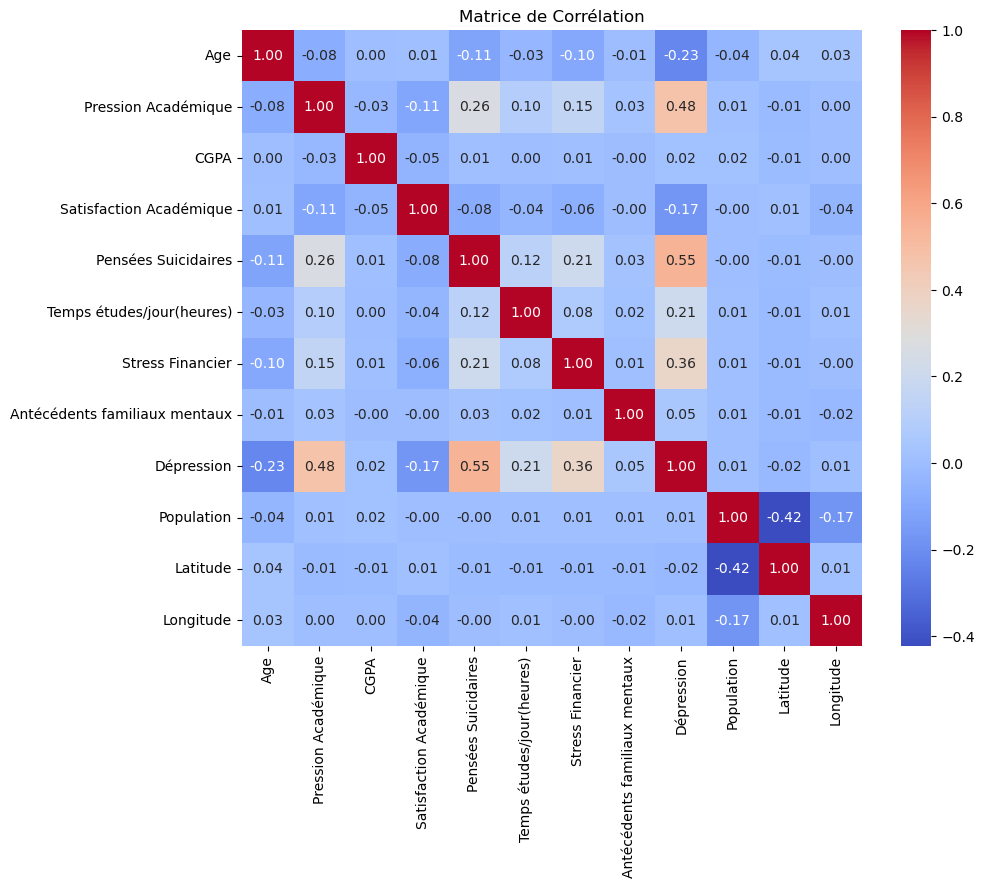

In [31]:
# Visualisation
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()

### Analyse et Interprétation de la Matrice de Corrélation

La matrice de corrélation met en évidence des relations clés entre les variables, en lien avec les KPIs et les stratégies précédemment définis :

- **Dépression** :
  - Corrélée positivement à **Pensées Suicidaires** (0.55) et **Pression Académique** (0.48). Cela confirme que la pression académique et les pensées suicidaires sont des facteurs significatifs à traiter en priorité.
  - Corrélée à un degré moindre avec **Stress Financier** (0.36). Ce facteur doit être intégré aux stratégies d'intervention.

- **Pensées Suicidaires** : 
  - Forte corrélation avec la **Pression Académique** (0.26). Cela renforce la nécessité d’interventions pour réduire la charge académique et améliorer la gestion du stress.

- **Satisfaction Académique** :
  - Corrélation négative avec **Dépression** (-0.17). Un faible niveau de satisfaction académique contribue potentiellement à la dépression. Favoriser un environnement académique plus satisfaisant pourrait réduire la détresse mentale.

- **Heures d’étude quotidiennes** :
  - Faible corrélation positive avec **Dépression** (0.21). Les étudiants qui consacrent des heures excessives aux études pourraient être à risque.

### Implications pour les Stratégies d'intervention
1. **Priorité sur les pensées suicidaires** : Intensifier le soutien psychologique pour les étudiants ayant des pensées suicidaires, particulièrement ceux sous forte pression académique.

2. **Gestion de la pression académique** : Proposer des ateliers de gestion du temps et réduire les attentes académiques excessives.
3. **Aide financière** : Les corrélations montrent que le stress financier joue un rôle notable, nécessitant des initiatives comme des bourses ou des conseils financiers.
4. **Amélioration de la satisfaction académique** : Réviser les systèmes éducatifs pour augmenter la satisfaction et réduire les niveaux de stress global.

Ces observations confirment et précisent les stratégies déjà décrites, en renforçant les priorités et les axes d’intervention.

---


## Conclusion et Recommandations

L'analyse des données a mis en lumière des ***indicateurs clés de la détérioration de la santé mentale des étudiants, tels qu'un taux élevé de dépression, des pensées suicidaires fréquentes, une pression académique modérée à élevée, et des disparités géographiques significatives***.

Ces insights appellent à des ***actions immédiates et coordonnées pour répondre aux besoins des étudiants les plus vulnérables***.

#### **Synthèse des Recommandations Stratégiques**
- **Renforcer le soutien psychologique** : Déployer des cellules d’écoute et de conseil dans les campus, avec un ciblage prioritaire des zones géographiques où le taux de dépression est le plus élevé.

- **Encourager des habitudes de vie saines** : Promouvoir un meilleur sommeil et une alimentation équilibrée via des ateliers éducatifs et des initiatives pratiques comme la distribution de repas sains.
- **Réduire la pression académique** : Proposer des programmes de gestion du stress et un accompagnement académique pour équilibrer les attentes éducatives et le bien-être des étudiants.
- **Soutenir financièrement les étudiants** : Mettre en place des bourses et des conseils financiers pour atténuer le stress financier, qui est un facteur aggravant.

#### **Ébauche d’un Plan d’Action pour l’antenne CampusCARE basée en Inde**
1. **Création de pôles d’information et de soutien** :  
   Installer des pôles dans les régions les plus touchées, comme Telangana et Bihar, pour offrir un accès direct à des ressources psychologiques, académiques, et nutritionnelles.

2. **Lancement de campagnes de sensibilisation** :  
   Organiser des campagnes sur les campus pour sensibiliser les étudiants aux enjeux de santé mentale, en mettant l’accent sur le sommeil, l’alimentation, et la gestion du stress.

3. **Formation du personnel éducatif** :  
   Former les enseignants et les administrateurs à reconnaître les signes de détresse chez les étudiants et à les orienter vers les services adaptés.

4. **Suivi des interventions** :  
   Mettre en place un tableau de bord interactif pour suivre les progrès des initiatives en temps réel et évaluer leur impact sur les KPIs.